In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA



In [2]:
df=pd.read_csv(r"C:\Users\kiran\OneDrive\文档\ml project.csv")
df.shape

(52583, 9)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
df.describe()

,S no,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [5]:
# removing Serial No column using drop
df=df.drop(columns=['S no'],errors='ignore')
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...
52578,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [6]:
# finding the missing values in the dataset
df.isna().sum()

Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [7]:
# rename the power consumption in a zone column as power consumption
df.rename(columns={' Power Consumption in A Zone':'Power Consumption'},inplace=True)
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...
52578,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [8]:
## convert the  object data type to Numeric data type
df['Temperature']=pd.to_numeric(df['Temperature'],errors='coerce')
df['Humidity']=pd.to_numeric(df['Humidity'],errors='coerce')
df['Wind Speed']=pd.to_numeric(df['Wind Speed'],errors='coerce')

In [9]:
## Handling missing values
df['Temperature']=df['Temperature'].fillna(df['Temperature'].mean()).iloc[0]
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mean()).iloc[0]
df['Wind Speed']=df['Wind Speed'].fillna(df['Wind Speed'].mean()).iloc[0]
df['general diffuse flows']=df['general diffuse flows'].fillna(df['general diffuse flows'].mean()).iloc[0]
df['diffuse flows']=df['diffuse flows'].fillna(df['diffuse flows'].mean()).iloc[0]
df['Air Quality Index (PM)']=df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].mean()).iloc[0]

In [10]:
# checking any column has object or string datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52583 non-null  float64
 1   Humidity                52583 non-null  float64
 2   Wind Speed              52583 non-null  float64
 3   general diffuse flows   52583 non-null  float64
 4   diffuse flows           52583 non-null  float64
 5   Air Quality Index (PM)  52583 non-null  float64
 6   Cloudiness              52583 non-null  int64  
 7   Power Consumption       52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [11]:
## checkin null values 
df.isna().sum()

Temperature               0
Humidity                  0
Wind Speed                0
general diffuse flows     0
diffuse flows             0
Air Quality Index (PM)    0
Cloudiness                0
Power Consumption         0
dtype: int64

In [12]:
#Training the dataset
features = ["Temperature", "Humidity", "Wind Speed", "general diffuse flows","diffuse flows", "Air Quality Index (PM)", "Cloudiness"]
X = df[features]
y=df['Power Consumption']


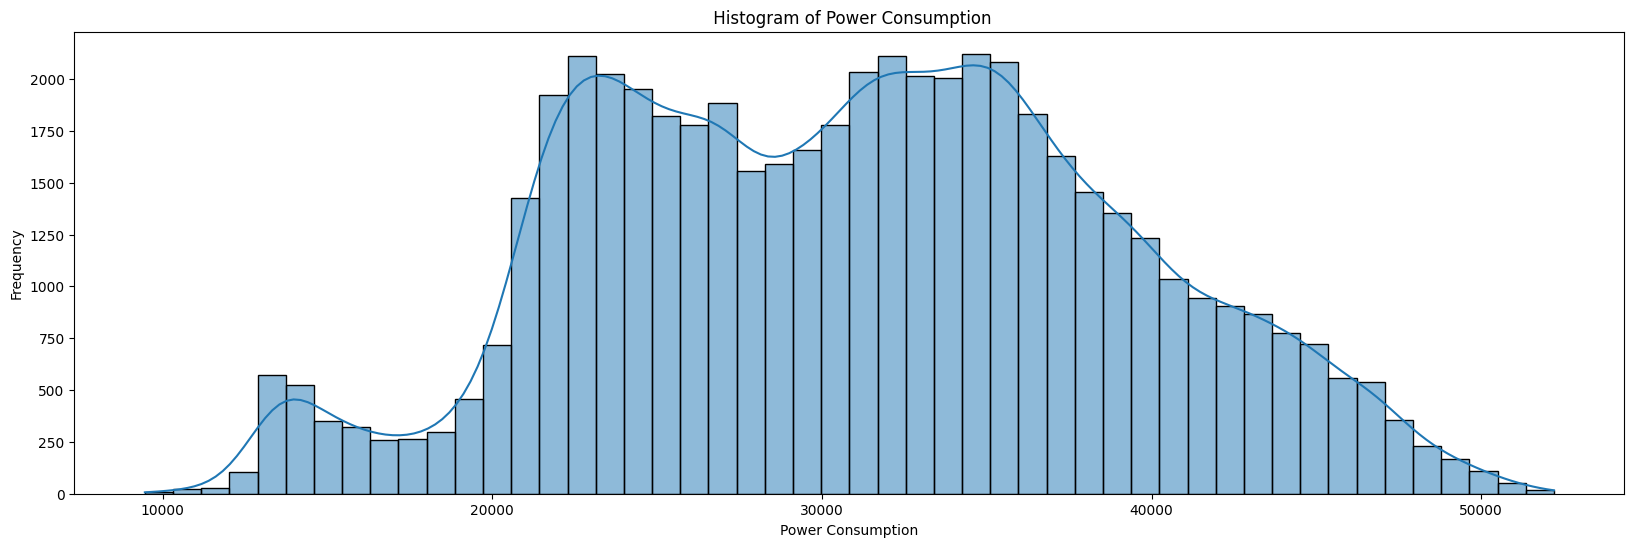

In [13]:
#  Histogram of Power Consumption
plt.figure(figsize=(20,6))
sns.histplot(df['Power Consumption'],bins=50,kde=True)
plt.title(' Histogram of Power Consumption')
plt.xlabel('Power Consumption')

plt.ylabel('Frequency')
plt.show()

In [26]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled


array([[ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  1.03001789e+01],
       [ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  1.03001789e+01],
       [ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  1.03001789e+01],
       ...,
       [ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00, -9.70856919e-02],
       [ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00, -9.70856919e-02],
       [ 8.88178420e-16,  2.84217094e-14,  1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00, -9.70856919e-02]])

In [15]:

# Apply PCA after standardization
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)


In [16]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=101)

In [17]:
# Print explained variance ratio
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")


Number of components selected: 1
Explained variance ratio: 1.0000


In [18]:
# Define hyperparameter grids for tuning
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Linear Regression': {}
}

In [19]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'Linear Regression': LinearRegression()
}

In [20]:
# train the model
best_models = {}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    #accuracy=accuracy_score(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2
 


Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Tuning SVR...
Best Parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Tuning Linear Regression...
Best Parameters for Linear Regression: {}


In [21]:
for name, model in best_models.items():
    print(f"\nEvaluating {name}...")
    mae, mse, rmse, r2  = evaluate_model(model, X_test, y_test)
    print(f"Mean Absolute Error:  {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R2 Score: {r2}")


Evaluating Random Forest...
Mean Absolute Error:  63655684.648767814
Root Mean Squared Error: 7978.451268809494
R2 Score: 0.014118346599883647

Evaluating Decision Tree...
Mean Absolute Error:  63655729.66173043
Root Mean Squared Error: 7978.454089717533
R2 Score: 0.014117649451557357

Evaluating SVR...
Mean Absolute Error:  63677507.263465226
Root Mean Squared Error: 7979.818748785289
R2 Score: 0.013780363973852516

Evaluating Linear Regression...
Mean Absolute Error:  63655729.66173043
Root Mean Squared Error: 7978.454089717533
R2 Score: 0.014117649451557357


In [29]:
import joblib
joblib.dump(best_models['Random Forest'],'random_forest_model.pkl')
joblib.dump(sc,'scaled.pkl')
joblib.dump(pca,'pca.pkl')

['pca.pkl']

In [30]:
import joblib
import numpy as np

# Load the trained model, scaler, and PCA
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaled.pkl')
pca = joblib.load('pca.pkl')  # Load PCA model (Must be saved during training)

# User input (Original 7 features)
user_input = np.array([[10, 50, 5, 20, 15, 40, 60]])

# Scale the input using the saved scaler
scaled_input = scaler.transform(user_input)

# Apply PCA transformation (Fix: Ensure PCA is applied)
scaled_input_pca = pca.transform(scaled_input)  

# Ensure correct input shape
print(f"Scaled PCA input shape: {scaled_input_pca.shape}")
print(f"Model expected features: {model.n_features_in_}")

# Make prediction
result = model.predict(scaled_input_pca)

print(f"Predicted Power Consumption: {result[0]:.2f} kWh")


Scaled PCA input shape: (1, 1)
Model expected features: 1
Predicted Power Consumption: 21129.49 kWh


In [31]:

import numpy as np

# Check input shape
print(f"Scaled input shape: {scaled_input.shape}")
print(f"Model expected features: {model.n_features_in_}")

# Reshape if necessary
if scaled_input.shape[1] != model.n_features_in_:
    scaled_input = scaled_input.reshape(-1, model.n_features_in_)

# Make prediction
result = model.predict(scaled_input)

Scaled input shape: (1, 7)
Model expected features: 1
